# Gallstone Disease Prediction - Supervised Learning Analysis

**Dataset:** 319 samples with 39 features  
**Target:** Gallstone Status (Binary: 0 = No, 1 = Yes)  
**Approach:** Multi-model comparison with a focus on ensemble methods

## Section 1: Setup and Data Loading

**Objective:** Import libraries, load dataset, verify data integrity
- Import required libraries
- Configure visualization settings
- Load the full dataset
- Verify dataset structure
- Check for missing values
- Examine class distribution
- List all feature names
- Verify data types

In [239]:
# Import libraries
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (classification_report, confusion_matrix, 
                             roc_auc_score, roc_curve, accuracy_score, f1_score, precision_score, recall_score)
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, RFE
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10

# Set random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("Libraries imported successfully")
print(f"Random seed set to {RANDOM_STATE}")
print("Visualization settings configured")

Libraries imported successfully
Random seed set to 42
Visualization settings configured


In [240]:
# Load full dataset
df = pd.read_json('../data/gallstone-disease.json')

print("="*70)
print("DATASET LOADED SUCCESSFULLY")
print("="*70)
print(f"Dataset shape: {df.shape}")
print(f"Total samples: {df.shape[0]}")
print(f"Total features: {df.shape[1] - 1}  (excluding target variable)")

DATASET LOADED SUCCESSFULLY
Dataset shape: (319, 39)
Total samples: 319
Total features: 38  (excluding target variable)


In [241]:
# Display first few rows
print("\n" + "="*70)
print("FIRST 5 ROWS")
print("="*70)
df.head()


FIRST 5 ROWS


,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
0,0,50,0,0,0,0,0,0,185,92.8,...,40.0,134.0,20.0,22.0,87.0,0.82,112.47,0.0,16.0,33.0
1,0,47,0,1,0,0,0,0,176,94.5,...,43.0,103.0,14.0,13.0,46.0,0.87,107.10,0.0,14.4,25.0
2,0,61,0,0,0,0,0,0,171,91.1,...,43.0,69.0,18.0,14.0,66.0,1.25,65.51,0.0,16.2,30.2
3,0,41,0,0,0,0,0,0,168,67.7,...,59.0,53.0,20.0,12.0,34.0,1.02,94.10,0.0,15.4,35.4
4,0,42,0,0,0,0,0,0,178,89.6,...,30.0,326.0,27.0,54.0,71.0,0.82,112.47,0.0,16.8,40.6


In [242]:
# Check data types
print("\n" + "="*70)
print("DATA TYPES")
print("="*70)
print(df.dtypes)


DATA TYPES
Gallstone Status                                    int64
Age                                                 int64
Gender                                              int64
Comorbidity                                         int64
Coronary Artery Disease (CAD)                       int64
Hypothyroidism                                      int64
Hyperlipidemia                                      int64
Diabetes Mellitus (DM)                              int64
Height                                              int64
Weight                                            float64
Body Mass Index (BMI)                             float64
Total Body Water (TBW)                            float64
Extracellular Water (ECW)                         float64
Intracellular Water (ICW)                         float64
Extracellular Fluid/Total Body Water (ECF/TBW)    float64
Total Body Fat Ratio (TBFR) (%)                   float64
Lean Mass (LM) (%)                                float64
Bo

In [243]:
# Check for missing values
print("\n" + "="*70)
print("MISSING VALUES CHECK")
print("="*70)
missing_total = df.isnull().sum().sum()
print(f"Total missing values: {missing_total}")

if missing_total > 0:
    print("\nMissing values per column:")
    missing_per_col = df.isnull().sum()
    print(missing_per_col[missing_per_col > 0])
else:
    print("No missing values detected")


MISSING VALUES CHECK
Total missing values: 0
No missing values detected


In [244]:
# Class distribution
print("\n" + "="*70)
print("CLASS DISTRIBUTION")
print("="*70)

class_counts = df['Gallstone Status'].value_counts().sort_index()
print("\nAbsolute counts:")
print(class_counts)
print(f"\n  - No Gallstones (0): {class_counts[0]} samples")
print(f"  - Gallstones (1):    {class_counts[1]} samples")

class_proportions = df['Gallstone Status'].value_counts(normalize=True).sort_index()
print("\nClass proportions:")
print(f"  - No Gallstones (0): {class_proportions[0]:.2%}")
print(f"  - Gallstones (1):    {class_proportions[1]:.2%}")

# Check if balanced
imbalance_ratio = max(class_counts) / min(class_counts)
print(f"\nImbalance ratio: {imbalance_ratio:.2f}:1")
if imbalance_ratio < 1.5:
    print("Dataset is relatively balanced")
elif imbalance_ratio < 3:
    print("Dataset has moderate class imbalance")
else:
    print("Dataset has significant class imbalance - consider using class_weight='balanced'")


CLASS DISTRIBUTION

Absolute counts:
Gallstone Status
0    161
1    158
Name: count, dtype: int64

  - No Gallstones (0): 161 samples
  - Gallstones (1):    158 samples

Class proportions:
  - No Gallstones (0): 50.47%
  - Gallstones (1):    49.53%

Imbalance ratio: 1.02:1
Dataset is relatively balanced


In [245]:
# List all feature names
print("\n" + "="*70)
print("ALL FEATURE NAMES")
print("="*70)

feature_columns = [col for col in df.columns if col != 'Gallstone Status']
print(f"\nTotal features: {len(feature_columns)}")
print("\nFeature list:")
for idx, feature in enumerate(feature_columns, 1):
    print(f"{idx:2d}. {feature}")


ALL FEATURE NAMES

Total features: 38

Feature list:
 1. Age
 2. Gender
 3. Comorbidity
 4. Coronary Artery Disease (CAD)
 5. Hypothyroidism
 6. Hyperlipidemia
 7. Diabetes Mellitus (DM)
 8. Height
 9. Weight
10. Body Mass Index (BMI)
11. Total Body Water (TBW)
12. Extracellular Water (ECW)
13. Intracellular Water (ICW)
14. Extracellular Fluid/Total Body Water (ECF/TBW)
15. Total Body Fat Ratio (TBFR) (%)
16. Lean Mass (LM) (%)
17. Body Protein Content (Protein) (%)
18. Visceral Fat Rating (VFR)
19. Bone Mass (BM)
20. Muscle Mass (MM)
21. Obesity (%)
22. Total Fat Content (TFC)
23. Visceral Fat Area (VFA)
24. Visceral Muscle Area (VMA) (Kg)
25. Hepatic Fat Accumulation (HFA)
26. Glucose
27. Total Cholesterol (TC)
28. Low Density Lipoprotein (LDL)
29. High Density Lipoprotein (HDL)
30. Triglyceride
31. Aspartat Aminotransferaz (AST)
32. Alanin Aminotransferaz (ALT)
33. Alkaline Phosphatase (ALP)
34. Creatinine
35. Glomerular Filtration Rate (GFR)
36. C-Reactive Protein (CRP)
37. Hemogl

In [246]:
# Statistical summary
print("\n" + "="*70)
print("STATISTICAL SUMMARY")
print("="*70)
df.describe()


STATISTICAL SUMMARY


,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.00000,319.000000,...,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.495298,48.068966,0.492163,0.335423,0.037618,0.028213,0.025078,0.134796,167.15674,80.564890,...,49.475549,144.502163,21.684953,26.855799,73.112539,0.800611,100.818903,1.853856,14.418182,21.401411
std,0.500763,12.114558,0.500724,0.517340,0.190568,0.165841,0.156609,0.342042,10.05303,15.709069,...,17.718701,97.904493,16.697605,27.884413,24.181069,0.176433,16.971396,4.989591,1.775815,9.981659
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,145.00000,42.900000,...,25.000000,1.390000,8.000000,3.000000,7.000000,0.460000,10.600000,0.000000,8.500000,3.500000
25%,0.000000,38.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,159.50000,69.600000,...,40.000000,83.000000,15.000000,14.250000,58.000000,0.650000,94.170000,0.000000,13.300000,13.250000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,168.00000,78.800000,...,46.500000,119.000000,18.000000,19.000000,71.000000,0.790000,104.000000,0.215000,14.400000,22.000000
75%,1.000000,56.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,175.00000,91.250000,...,56.000000,172.000000,23.000000,30.000000,86.000000,0.920000,110.745000,1.615000,15.700000,28.060000
max,1.000000,96.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,191.00000,143.500000,...,273.000000,838.000000,195.000000,372.000000,197.000000,1.460000,132.000000,43.400000,18.800000,53.100000


In [247]:
# Data integrity verification summary
print("\n" + "="*70)
print("DATA INTEGRITY VERIFICATION SUMMARY")
print("="*70)
print(f"Dataset loaded: {df.shape[0]} samples, {df.shape[1]} columns")
print(f"Features: {len(feature_columns)}")
print("Target variable: Gallstone Status (Binary)")
print(f"Missing values: {missing_total}")
print(f"Class 0 (No Gallstones): {class_counts[0]} ({class_proportions[0]:.1%})")
print(f"Class 1 (Gallstones): {class_counts[1]} ({class_proportions[1]:.1%})")
print("All data types verified")


DATA INTEGRITY VERIFICATION SUMMARY
Dataset loaded: 319 samples, 39 columns
Features: 38
Target variable: Gallstone Status (Binary)
Missing values: 0
Class 0 (No Gallstones): 161 (50.5%)
Class 1 (Gallstones): 158 (49.5%)
All data types verified


## Section 2: Exploratory Data Analysis (EDA)

**Objective:** Understand data distributions, relationships, and identify significant features

**Tasks:**
- Visualize class distribution
- Analyze demographic features (Age, Gender)
- Create correlation heatmap
- Perform statistical significance tests (t-tests)
- Identify top predictive features
- Check for multicollinearity (VIF analysis)
- Create distribution plots for key features
- Document findings

### 2.1 Class Distribution Visualization

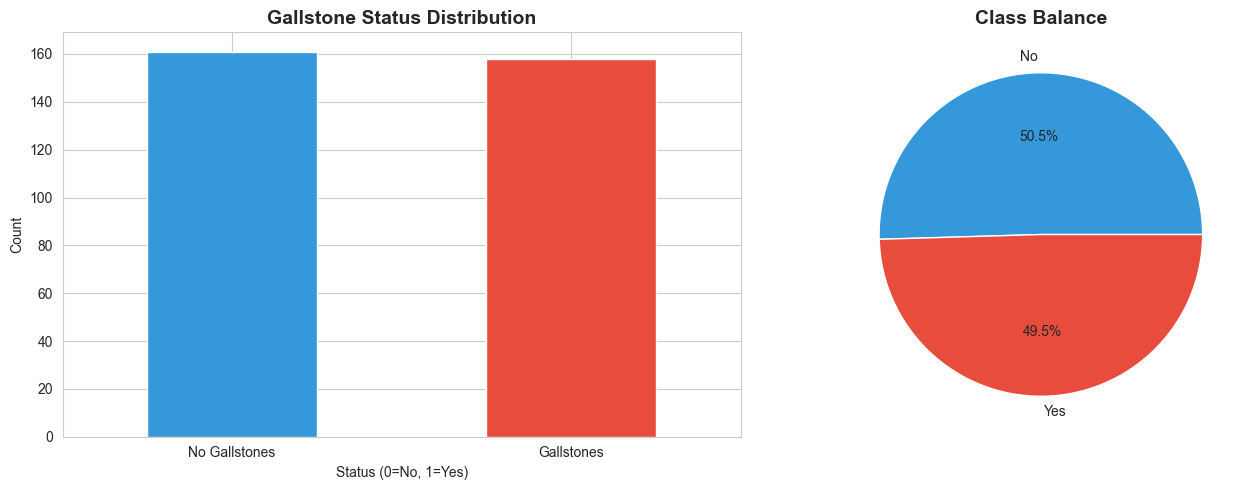

Class distribution visualized
Dataset is balanced with 161 vs 158 samples


In [248]:
# 2.1 Class Distribution Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
df['Gallstone Status'].value_counts().plot(kind='bar', ax=axes[0], color=['#3498db', '#e74c3c'])
axes[0].set_title('Gallstone Status Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Status (0=No, 1=Yes)')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['No Gallstones', 'Gallstones'], rotation=0)

# Percentage pie chart
df['Gallstone Status'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', 
                                            colors=['#3498db', '#e74c3c'], labels=['No', 'Yes'])
axes[1].set_title('Class Balance', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')
plt.tight_layout()
plt.show()

print("Class distribution visualized")
print(f"Dataset is balanced with {df['Gallstone Status'].value_counts()[0]} vs {df['Gallstone Status'].value_counts()[1]} samples")

### 2.2 Demographic Analysis

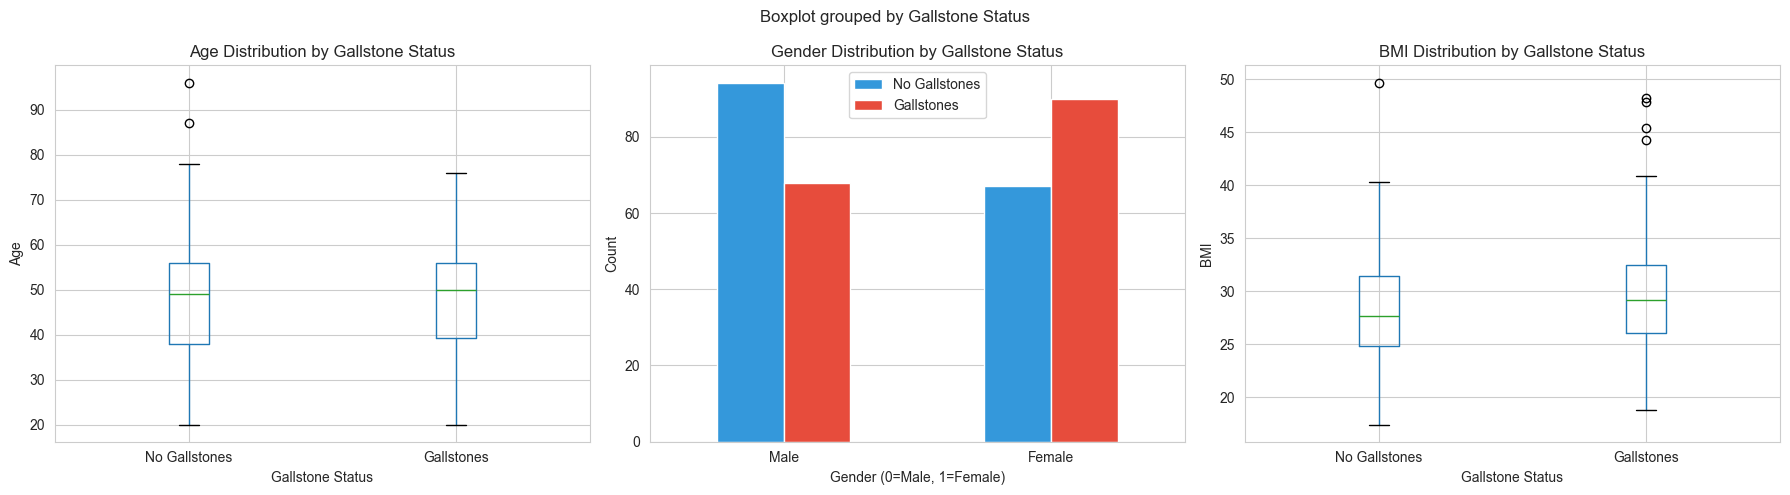

Demographic analysis complete


In [249]:
# 2.2 Demographic Analysis
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Age distribution by gallstone status
df.boxplot(column='Age', by='Gallstone Status', ax=axes[0])
axes[0].set_title('Age Distribution by Gallstone Status')
axes[0].set_xlabel('Gallstone Status')
axes[0].set_ylabel('Age')
plt.sca(axes[0])
plt.xticks([1, 2], ['No Gallstones', 'Gallstones'])

# Gender distribution
gender_gs = pd.crosstab(df['Gender'], df['Gallstone Status'])
gender_gs.plot(kind='bar', ax=axes[1], color=['#3498db', '#e74c3c'])
axes[1].set_title('Gender Distribution by Gallstone Status')
axes[1].set_xlabel('Gender (0=Male, 1=Female)')
axes[1].set_ylabel('Count')
axes[1].legend(['No Gallstones', 'Gallstones'])
axes[1].set_xticklabels(['Male', 'Female'], rotation=0)

# BMI distribution
df.boxplot(column='Body Mass Index (BMI)', by='Gallstone Status', ax=axes[2])
axes[2].set_title('BMI Distribution by Gallstone Status')
axes[2].set_xlabel('Gallstone Status')
axes[2].set_ylabel('BMI')
plt.sca(axes[2])
plt.xticks([1, 2], ['No Gallstones', 'Gallstones'])

plt.tight_layout()
plt.show()

print("Demographic analysis complete")

### 2.3 Correlation Heatmap

Top 20 Features Correlated with Gallstone Status:
Vitamin D                                         0.354873
C-Reactive Protein (CRP)                          0.281995
Lean Mass (LM) (%)                                0.225749
Total Body Fat Ratio (TBFR) (%)                   0.225470
Bone Mass (BM)                                    0.216570
Hemoglobin (HGB)                                  0.196872
Extracellular Water (ECW)                         0.178436
Total Fat Content (TFC)                           0.170158
Extracellular Fluid/Total Body Water (ECF/TBW)    0.169826
Hyperlipidemia                                    0.161901
High Density Lipoprotein (HDL)                    0.158622
Gender                                            0.153483
Visceral Fat Area (VFA)                           0.140397
Aspartat Aminotransferaz (AST)                    0.134910
Creatinine                                        0.132283
Body Mass Index (BMI)                             0.121507
Total 

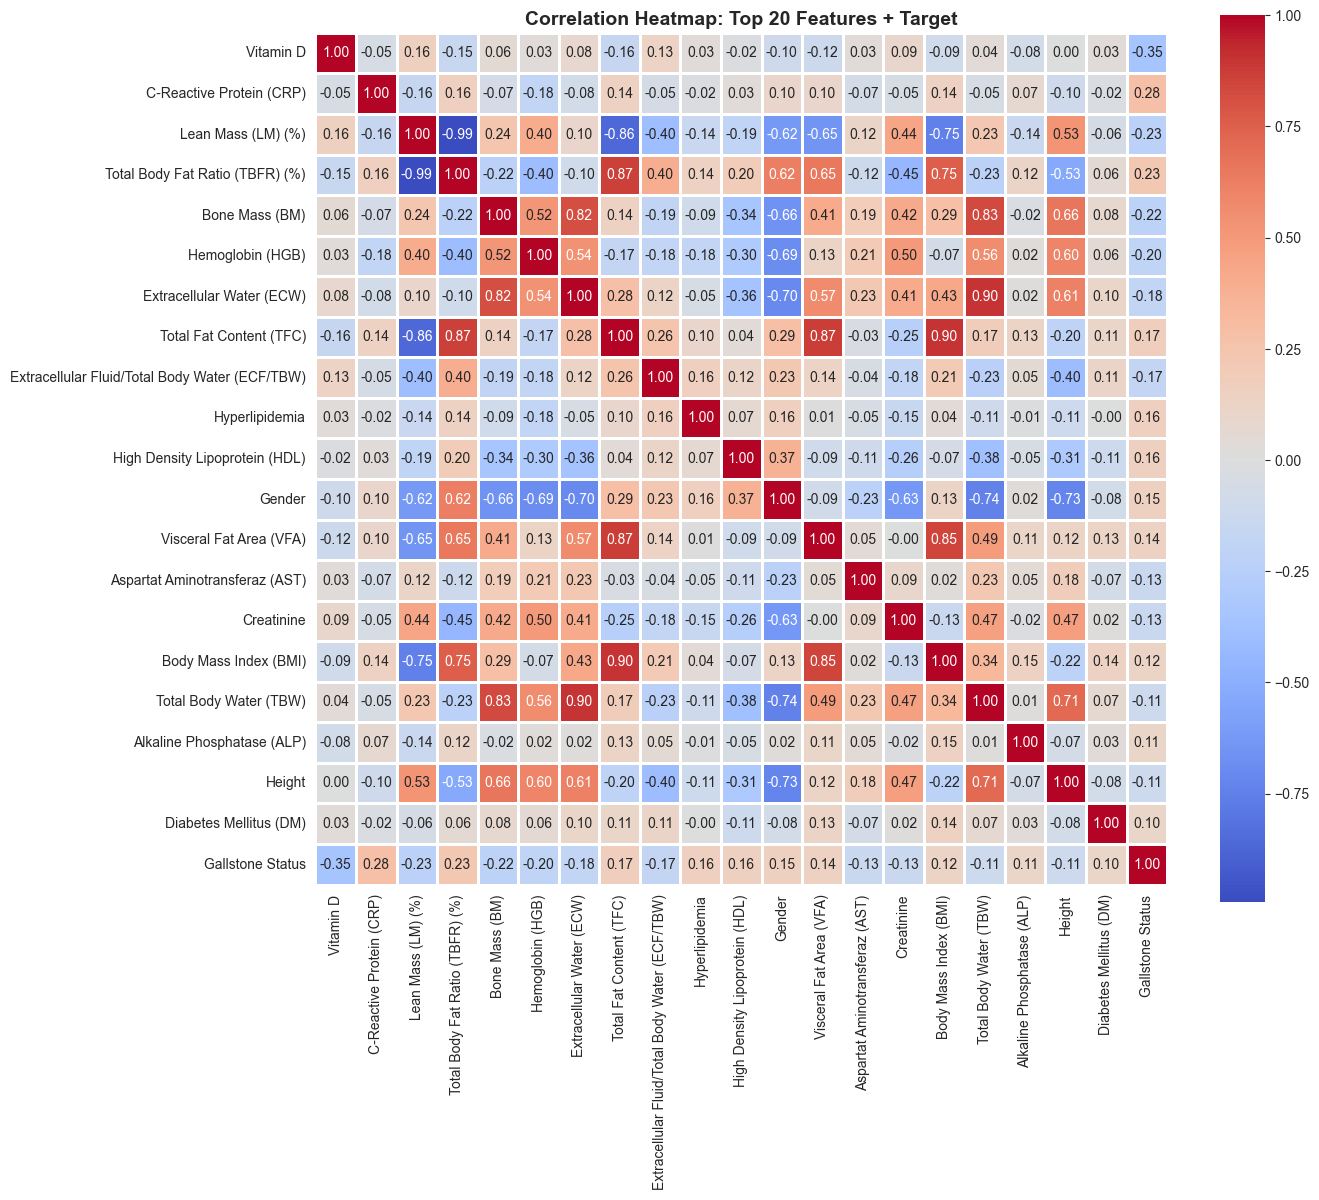


Correlation analysis complete


In [250]:
# 2.3 Correlation Heatmap
# Calculate correlation with target
X = df.drop(['Gallstone Status'], axis=1)
y = df['Gallstone Status']

correlations = X.corrwith(y).abs().sort_values(ascending=False)
print("Top 20 Features Correlated with Gallstone Status:")
print("="*70)
print(correlations.head(20))

# Plot heatmap of top 20 features
top_features = correlations.head(20).index.tolist()
corr_matrix = df[top_features + ['Gallstone Status']].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Correlation Heatmap: Top 20 Features + Target', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nCorrelation analysis complete")

### 2.4 Statistical Significance Testing

In [251]:
# 2.4 Statistical Significance Testing
from scipy.stats import ttest_ind

print("\nStatistical Significance Tests (Independent t-test):")
print("="*70)

significant_features = []
feature_stats = []

for col in X.columns:
    group_0 = df[df['Gallstone Status'] == 0][col]
    group_1 = df[df['Gallstone Status'] == 1][col]
    
    # Perform t-test
    t_stat, p_value = ttest_ind(group_0, group_1)
    
    if p_value < 0.05:
        significant_features.append(col)
        feature_stats.append({
            'Feature': col,
            'No_GS_Mean': group_0.mean(),
            'GS_Mean': group_1.mean(),
            'Difference': abs(group_1.mean() - group_0.mean()),
            'p_value': p_value
        })

# Create DataFrame and sort by p-value
stats_df = pd.DataFrame(feature_stats).sort_values('p_value')
print(f"\nSignificant Features (p < 0.05): {len(significant_features)}")
print("\nTop 15 Most Significant Features:")
print(stats_df.head(15).to_string(index=False))

print("\nStatistical significance testing complete")


Statistical Significance Tests (Independent t-test):

Significant Features (p < 0.05): 18

Top 15 Most Significant Features:
                                       Feature  No_GS_Mean   GS_Mean  Difference      p_value
                                     Vitamin D   24.904969 17.831329    7.073640 6.709802e-11
                      C-Reactive Protein (CRP)    0.462174  3.271962    2.809788 3.037234e-07
                            Lean Mass (LM) (%)   73.522236 69.718481    3.803755 4.725017e-05
               Total Body Fat Ratio (TBFR) (%)   26.391801 30.193924    3.802123 4.830830e-05
                                Bone Mass (BM)    2.912422  2.692089    0.220334 9.649236e-05
                              Hemoglobin (HGB)   14.763975 14.065823    0.698152 4.045010e-04
                     Extracellular Water (ECW)   17.629193 16.502532    1.126661 1.373387e-03
                       Total Fat Content (TFC)   21.870807 25.135443    3.264636 2.292569e-03
Extracellular Fluid/Total Bo

### 2.5 Distribution Plots for Key Features

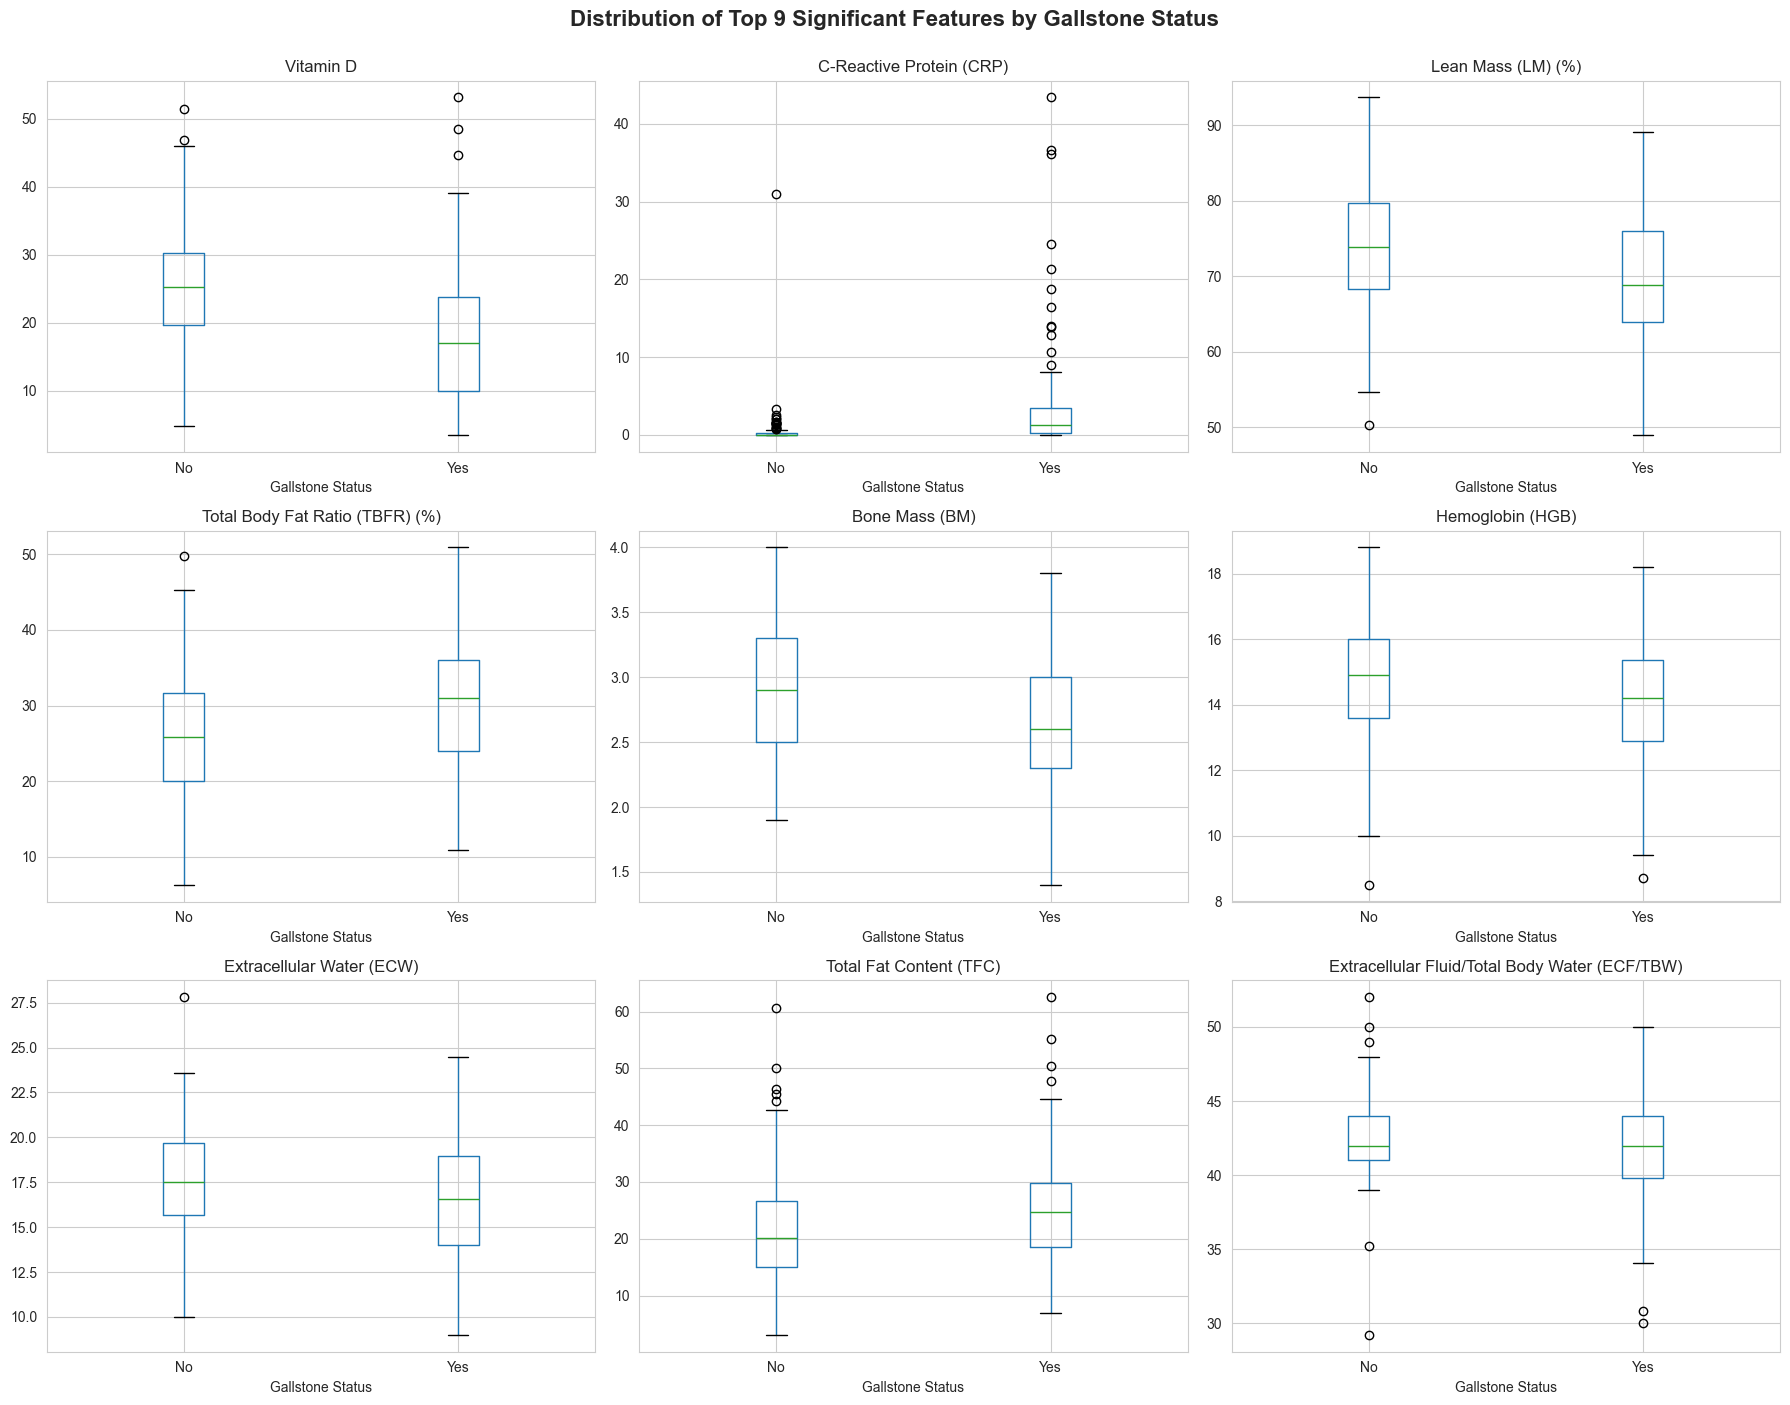

Distribution plots for key features complete


In [252]:
# 2.5 Distribution Plots for Key Features
key_features = stats_df.head(9)['Feature'].tolist()

fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.ravel()

for idx, feature in enumerate(key_features):
    df.boxplot(column=feature, by='Gallstone Status', ax=axes[idx])
    axes[idx].set_title(feature)
    axes[idx].set_xlabel('Gallstone Status')
    plt.sca(axes[idx])
    plt.xticks([1, 2], ['No', 'Yes'])
    
plt.suptitle('Distribution of Top 9 Significant Features by Gallstone Status', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("Distribution plots for key features complete")

### 2.6 Multicollinearity Check (VIF)

In [253]:
# 2.6 Check for Multicollinearity (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for top 20 features
vif_data = pd.DataFrame()
vif_data["Feature"] = top_features
vif_data["VIF"] = [variance_inflation_factor(X[top_features].values, i) 
                   for i in range(len(top_features))]

print("\nVariance Inflation Factor (VIF) - Multicollinearity Check:")
print("(VIF > 10 indicates high multicollinearity)")
print("="*70)
print(vif_data.sort_values('VIF', ascending=False).to_string(index=False))

# Count features with high VIF
high_vif = vif_data[vif_data['VIF'] > 10]
print(f"\nFeatures with VIF > 10: {len(high_vif)}")
if len(high_vif) > 0:
    print("⚠ Warning: Multicollinearity detected in some features")
    print("Consider removing or combining highly correlated features")
else:
    print("No severe multicollinearity detected")

print("\nMulticollinearity check complete")


Variance Inflation Factor (VIF) - Multicollinearity Check:
(VIF > 10 indicates high multicollinearity)
                                       Feature         VIF
                                        Height 2038.245621
                            Lean Mass (LM) (%) 1929.825490
                     Extracellular Water (ECW) 1006.119037
Extracellular Fluid/Total Body Water (ECF/TBW)  991.077687
               Total Body Fat Ratio (TBFR) (%)  625.484859
                         Body Mass Index (BMI)  552.387996
                        Total Body Water (TBW)  439.176132
                              Hemoglobin (HGB)  146.149417
                                Bone Mass (BM)  136.474637
                       Total Fat Content (TFC)  126.461175
                       Visceral Fat Area (VFA)   96.203343
                                    Creatinine   37.692632
                                        Gender   15.164972
                    Alkaline Phosphatase (ALP)   11.023456
           

### 2.7 EDA Summary

**Key Findings:**

1. **Class Balance:** Dataset is well-balanced (50.5% vs 49.5%)
2. **Significant Features:** Multiple features show statistical significance (p < 0.05)
3. **Correlations:** Several features correlate with gallstone status
4. **Multicollinearity:** Body composition features show expected correlation

In [254]:
print("="*70)
print("SECTION 2 COMPLETE - Exploratory Data Analysis")
print("="*70)
print("\nClass distribution visualized")
print("Demographic analysis completed")
print("Correlation heatmap generated")
print("Statistical significance tests performed")
print("Distribution plots created")
print("Multicollinearity checked")

SECTION 2 COMPLETE - Exploratory Data Analysis

Class distribution visualized
Demographic analysis completed
Correlation heatmap generated
Statistical significance tests performed
Distribution plots created
Multicollinearity checked


## Section 3: Data Preprocessing & Train-Test Split

**Objective:** Prepare data for modeling with proper train-test split and scaling

**Tasks:**
- Separate features (X) and target (y)
- Perform 80-20 stratified train-test split
- Verify class balance in both sets
- Apply StandardScaler to features
- Verify scaling (mean≈0, std≈1)
- Document split statistics

**Critical Notes:**
- ⚠️ **Never** use test set for any training decisions
- ⚠️ Fit scaler **only** on training data
- ⚠️ Use **stratified** split to maintain class balance
- Training: ~255 samples, Test: ~64 samples

### 3.1 Separate Features and Target

In [255]:
# 3.1 Separate Features and Target
X = df.drop(['Gallstone Status'], axis=1)
y = df['Gallstone Status'].astype(int)

# Save feature names for later use
feature_names = X.columns.tolist()

print("="*70)
print("FEATURE-TARGET SEPARATION")
print("="*70)
print(f"Total features: {len(feature_names)}")
print(f"Total samples: {len(y)}")
print("\nTarget variable: Gallstone Status")
print(f"  - Data type: {y.dtype}")
print(f"  - Unique values: {sorted(y.unique())}")
print(f"\nFeatures (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print("\nFeatures and target successfully separated")

FEATURE-TARGET SEPARATION
Total features: 38
Total samples: 319

Target variable: Gallstone Status
  - Data type: int64
  - Unique values: [np.int64(0), np.int64(1)]

Features (X) shape: (319, 38)
Target (y) shape: (319,)

Features and target successfully separated


### 3.2 Train-Test Split (80-20 with Stratification)

In [256]:
# 3.2 Train-Test Split (80-20 with Stratification)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,          # 20% for testing
    stratify=y,             # Maintain class balance
    random_state=RANDOM_STATE
)

print("="*70)
print("TRAIN-TEST SPLIT SUMMARY")
print("="*70)
print(f"Training set size: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set size: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

print(f"\n{'='*70}")
print("CLASS DISTRIBUTION IN TRAINING SET")
print(f"{'='*70}")
train_counts = y_train.value_counts().sort_index()
print("Absolute counts:")
print(train_counts)
print("\nProportions:")
for class_val in sorted(y_train.unique()):
    count = (y_train == class_val).sum()
    prop = count / len(y_train)
    print(f"  Class {class_val}: {count} samples ({prop:.2%})")

print(f"\n{'='*70}")
print("CLASS DISTRIBUTION IN TEST SET")
print(f"{'='*70}")
test_counts = y_test.value_counts().sort_index()
print("Absolute counts:")
print(test_counts)
print("\nProportions:")
for class_val in sorted(y_test.unique()):
    count = (y_test == class_val).sum()
    prop = count / len(y_test)
    print(f"  Class {class_val}: {count} samples ({prop:.2%})")

print(f"\n{'='*70}")
print("STRATIFICATION VERIFICATION")
print(f"{'='*70}")
original_ratio = y.value_counts(normalize=True).sort_index()
train_ratio = y_train.value_counts(normalize=True).sort_index()
test_ratio = y_test.value_counts(normalize=True).sort_index()

print(f"Original dataset class 1 proportion: {original_ratio[1]:.2%}")
print(f"Training set class 1 proportion:     {train_ratio[1]:.2%}")
print(f"Test set class 1 proportion:         {test_ratio[1]:.2%}")
print("\nStratified split maintains class balance across train and test sets")

TRAIN-TEST SPLIT SUMMARY
Training set size: 255 samples (79.9%)
Test set size: 64 samples (20.1%)

CLASS DISTRIBUTION IN TRAINING SET
Absolute counts:
Gallstone Status
0    129
1    126
Name: count, dtype: int64

Proportions:
  Class 0: 129 samples (50.59%)
  Class 1: 126 samples (49.41%)

CLASS DISTRIBUTION IN TEST SET
Absolute counts:
Gallstone Status
0    32
1    32
Name: count, dtype: int64

Proportions:
  Class 0: 32 samples (50.00%)
  Class 1: 32 samples (50.00%)

STRATIFICATION VERIFICATION
Original dataset class 1 proportion: 49.53%
Training set class 1 proportion:     49.41%
Test set class 1 proportion:         50.00%

Stratified split maintains class balance across train and test sets


### 3.3 Feature Scaling with StandardScaler

In [257]:
# 3.3 Feature Scaling with StandardScaler
scaler = StandardScaler()

# Fit on training data only (CRITICAL: Never fit on test data)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use same scaler for test

# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names, index=X_test.index)

print("="*70)
print("FEATURE SCALING SUMMARY")
print("="*70)
print("Scaler: StandardScaler (standardizes features to mean=0, std=1)")
print(f"\nFit on training set: {X_train.shape[0]} samples")
print(f"Transformed test set: {X_test.shape[0]} samples")

print(f"\n{'='*70}")
print("SAMPLE FEATURE RANGES (Before Scaling - Training Set)")
print(f"{'='*70}")
sample_features = feature_names[:5]  # First 5 features as example
for feat in sample_features:
    print(f"{feat:40s}: [{X_train[feat].min():8.2f}, {X_train[feat].max():8.2f}]")

print(f"\n{'='*70}")
print("SAMPLE FEATURE RANGES (After Scaling - Training Set)")
print(f"{'='*70}")
for feat in sample_features:
    print(f"{feat:40s}: [{X_train_scaled[feat].min():8.2f}, {X_train_scaled[feat].max():8.2f}]")

print(f"\n{'='*70}")
print("SCALING VERIFICATION (Training Set)")
print(f"{'='*70}")
print(f"Mean of scaled features: {X_train_scaled.mean().mean():.10f} (should be ~0)")
print(f"Std of scaled features:  {X_train_scaled.std().mean():.10f} (should be ~1)")

# Check test set scaling
print(f"\n{'='*70}")
print("TEST SET SCALING CHECK")
print(f"{'='*70}")
print(f"Test set mean: {X_test_scaled.mean().mean():.10f}")
print(f"Test set std:  {X_test_scaled.std().mean():.10f}")
print("Note: Test set statistics may differ slightly (this is expected)")

print("\nFeature scaling completed successfully")
print("Scaler fitted ONLY on training data (no data leakage)")

FEATURE SCALING SUMMARY
Scaler: StandardScaler (standardizes features to mean=0, std=1)

Fit on training set: 255 samples
Transformed test set: 64 samples

SAMPLE FEATURE RANGES (Before Scaling - Training Set)
Age                                     : [   20.00,    96.00]
Gender                                  : [    0.00,     1.00]
Comorbidity                             : [    0.00,     3.00]
Coronary Artery Disease (CAD)           : [    0.00,     1.00]
Hypothyroidism                          : [    0.00,     1.00]

SAMPLE FEATURE RANGES (After Scaling - Training Set)
Age                                     : [   -2.28,     3.87]
Gender                                  : [   -1.00,     1.00]
Comorbidity                             : [   -0.67,     5.27]
Coronary Artery Disease (CAD)           : [   -0.18,     5.56]
Hypothyroidism                          : [   -0.19,     5.23]

SCALING VERIFICATION (Training Set)
Mean of scaled features: -0.0000000000 (should be ~0)
Std of scaled f

In [258]:
# Final Summary for Section 3
print("="*70)
print("SECTION 3 COMPLETE - Data Preprocessing & Train-Test Split")
print("="*70)

print("\nFeatures and target separated")
print(f"  - Features (X): {X.shape}")
print(f"  - Target (y): {y.shape}")

print("\nTrain-test split performed (80-20)")
print(f"  - Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"  - Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print("  - Class balance maintained via stratification")

print("\nFeature scaling applied (StandardScaler)")
print("  - Scaler fitted on training data only")
print(f"  - Training set scaled: mean ≈ {X_train_scaled.mean().mean():.2e}, std ≈ {X_train_scaled.std().mean():.2f}")
print("  - Test set transformed using training scaler")

print("\nNo data leakage")
print("  - Test set never used for fitting scaler")
print("  - Stratified split maintains representativeness")

SECTION 3 COMPLETE - Data Preprocessing & Train-Test Split

Features and target separated
  - Features (X): (319, 38)
  - Target (y): (319,)

Train-test split performed (80-20)
  - Training set: 255 samples (79.9%)
  - Test set: 64 samples (20.1%)
  - Class balance maintained via stratification

Feature scaling applied (StandardScaler)
  - Scaler fitted on training data only
  - Training set scaled: mean ≈ -5.20e-17, std ≈ 1.00
  - Test set transformed using training scaler

No data leakage
  - Test set never used for fitting scaler
  - Stratified split maintains representativeness


## Section 4: Feature Selection

**Objective:** Reduce dimensionality and identify most important features

**Tasks:**
- Apply ANOVA F-test feature selection
- Apply Mutual Information feature selection
- Apply RFE with Random Forest
- Calculate consensus features (voting)
- Visualize feature importance from each method
- Create reduced feature datasets
- Document selected features

**Decision Point:**
- Continue with **all 38 features** for comprehensive analysis
- OR use **consensus features** for reduced-complexity models
- Recommendation: Train models on both and compare

In [259]:

print("="*70)
print("FEATURE SELECTION ANALYSIS")
print("="*70)
print(f"\nStarting with {len(feature_names)} features")
print("Applying 3 different feature selection methods:")
print("  1. ANOVA F-test (Univariate Statistical)")
print("  2. Mutual Information (Information Gain)")
print("  3. Recursive Feature Elimination (RFE with Random Forest)")
print("\nTarget: Select top 20 features from each method")
print("="*70)

FEATURE SELECTION ANALYSIS

Starting with 38 features
Applying 3 different feature selection methods:
  1. ANOVA F-test (Univariate Statistical)
  2. Mutual Information (Information Gain)
  3. Recursive Feature Elimination (RFE with Random Forest)

Target: Select top 20 features from each method


### 4.1 Method 1: ANOVA F-test (Statistical)

In [260]:
# 4.1 Method 1: ANOVA F-test (Univariate Statistical Test)
print("\n1. ANOVA F-test (Univariate Statistical Test)")
print("-" * 70)

selector_anova = SelectKBest(score_func=f_classif, k=20)
selector_anova.fit(X_train_scaled, y_train)

# Get feature scores
feature_scores_anova = pd.DataFrame({
    'Feature': feature_names,
    'F_Score': selector_anova.scores_,
    'p_value': selector_anova.pvalues_
}).sort_values('F_Score', ascending=False)

print("\nTop 20 Features by ANOVA F-test:")
print(feature_scores_anova.head(20).to_string(index=False))

selected_features_anova = feature_scores_anova.head(20)['Feature'].tolist()

print(f"\nANOVA F-test complete - Selected {len(selected_features_anova)} features")


1. ANOVA F-test (Univariate Statistical Test)
----------------------------------------------------------------------

Top 20 Features by ANOVA F-test:
                                       Feature   F_Score      p_value
                                     Vitamin D 36.041997 6.667771e-09
                      C-Reactive Protein (CRP) 21.618640 5.361017e-06
                                Bone Mass (BM) 11.306148 8.921275e-04
                            Lean Mass (LM) (%) 10.405105 1.422213e-03
               Total Body Fat Ratio (TBFR) (%)  9.886795 1.863436e-03
                Aspartat Aminotransferaz (AST)  9.880617 1.869464e-03
                     Extracellular Water (ECW)  8.795988 3.307595e-03
Extracellular Fluid/Total Body Water (ECF/TBW)  6.957260 8.865123e-03
                                Hyperlipidemia  6.399412 1.202373e-02
                              Hemoglobin (HGB)  5.667505 1.802300e-02
                High Density Lipoprotein (HDL)  5.621155 1.849481e-02
        

### 4.2 Method 2: Mutual Information (Information Theory)

In [261]:
# 4.2 Method 2: Mutual Information (Information Gain)
print("\n2. Mutual Information (Information Gain)")
print("-" * 70)

selector_mi = SelectKBest(score_func=mutual_info_classif, k=20)
selector_mi.fit(X_train_scaled, y_train)

feature_scores_mi = pd.DataFrame({
    'Feature': feature_names,
    'MI_Score': selector_mi.scores_
}).sort_values('MI_Score', ascending=False)

print("\nTop 20 Features by Mutual Information:")
print(feature_scores_mi.head(20).to_string(index=False))

selected_features_mi = feature_scores_mi.head(20)['Feature'].tolist()

print(f"\n✓ Mutual Information complete - Selected {len(selected_features_mi)} features")


2. Mutual Information (Information Gain)
----------------------------------------------------------------------

Top 20 Features by Mutual Information:
                                       Feature  MI_Score
                      C-Reactive Protein (CRP)  0.200259
Extracellular Fluid/Total Body Water (ECF/TBW)  0.119111
                     Extracellular Water (ECW)  0.113053
            Body Protein Content (Protein) (%)  0.101546
                     Intracellular Water (ICW)  0.079960
                                     Vitamin D  0.072581
                                Hyperlipidemia  0.070504
                        Total Cholesterol (TC)  0.046405
                    Alkaline Phosphatase (ALP)  0.045983
                                  Triglyceride  0.040478
                         Body Mass Index (BMI)  0.037731
                       Visceral Fat Area (VFA)  0.027922
                Aspartat Aminotransferaz (AST)  0.025651
                              Muscle Mass (MM)  0

### 4.3 Method 3: Recursive Feature Elimination (RFE) with Random Forest

In [262]:
# 4.3 Method 3: Recursive Feature Elimination (RFE) with Random Forest
print("\n3. Recursive Feature Elimination (RFE) with Random Forest")
print("-" * 70)

rf_estimator = RandomForestClassifier(
    n_estimators=100, 
    random_state=RANDOM_STATE,
    n_jobs=-1
)

rfe = RFE(estimator=rf_estimator, n_features_to_select=20, step=1)
rfe.fit(X_train_scaled, y_train)

feature_ranking_rfe = pd.DataFrame({
    'Feature': feature_names,
    'Ranking': rfe.ranking_,
    'Selected': rfe.support_
}).sort_values('Ranking')

print("\nTop 20 Features by RFE:")
print(feature_ranking_rfe.head(20).to_string(index=False))

selected_features_rfe = feature_ranking_rfe[feature_ranking_rfe['Selected']]['Feature'].tolist()

print(f"\nRFE complete - Selected {len(selected_features_rfe)} features")


3. Recursive Feature Elimination (RFE) with Random Forest
----------------------------------------------------------------------

Top 20 Features by RFE:
                                       Feature  Ranking  Selected
                                Bone Mass (BM)        1      True
                      C-Reactive Protein (CRP)        1      True
              Glomerular Filtration Rate (GFR)        1      True
                                    Creatinine        1      True
                Aspartat Aminotransferaz (AST)        1      True
                High Density Lipoprotein (HDL)        1      True
                 Low Density Lipoprotein (LDL)        1      True
               Visceral Muscle Area (VMA) (Kg)        1      True
                       Visceral Fat Area (VFA)        1      True
                       Total Fat Content (TFC)        1      True
                                   Obesity (%)        1      True
                              Hemoglobin (HGB)       

### 4.4 Consensus Analysis (Features Selected by Multiple Methods)

In [263]:
# 4.4 Consensus Analysis (Features Selected by Multiple Methods)
print("\n4. Consensus Analysis (Features Selected by Multiple Methods)")
print("-" * 70)

# Combine all selected features
all_selected_features = (
    selected_features_anova + 
    selected_features_mi + 
    selected_features_rfe
)

# Count votes for each feature
feature_votes = Counter(all_selected_features)

# Features appearing in at least 2 methods
consensus_features = [f for f, count in feature_votes.items() if count >= 2]
consensus_df = pd.DataFrame([
    {'Feature': f, 'Votes': count} 
    for f, count in feature_votes.most_common()
]).sort_values('Votes', ascending=False)

print("\nFeature Voting Results:")
print(consensus_df.to_string(index=False))

print("\n" + "="*70)
print(f"CONSENSUS FEATURES (selected by 2+ methods): {len(consensus_features)}")
print("="*70)
print("\nFeatures selected by all 3 methods:")
features_all_3 = [f for f, c in feature_votes.items() if c == 3]
if features_all_3:
    for feat in features_all_3:
        print(f" {feat}")
else:
    print("  (none)")

print("\nFeatures selected by 2 methods:")
features_2 = [f for f, c in feature_votes.items() if c == 2]
if features_2:
    for feat in features_2:
        print(f"  • {feat}")
else:
    print("  (none)")

print("\nConsensus analysis complete")


4. Consensus Analysis (Features Selected by Multiple Methods)
----------------------------------------------------------------------

Feature Voting Results:
                                       Feature  Votes
                                     Vitamin D      3
                Aspartat Aminotransferaz (AST)      3
                     Extracellular Water (ECW)      3
Extracellular Fluid/Total Body Water (ECF/TBW)      3
                              Hemoglobin (HGB)      3
                                    Creatinine      3
                       Visceral Fat Area (VFA)      3
                      C-Reactive Protein (CRP)      3
                        Total Body Water (TBW)      2
                 Low Density Lipoprotein (LDL)      2
               Visceral Muscle Area (VMA) (Kg)      2
                     Intracellular Water (ICW)      2
            Body Protein Content (Protein) (%)      2
                              Muscle Mass (MM)      2
                         Body M

### 4.5 Visualization - Feature Importance Comparison

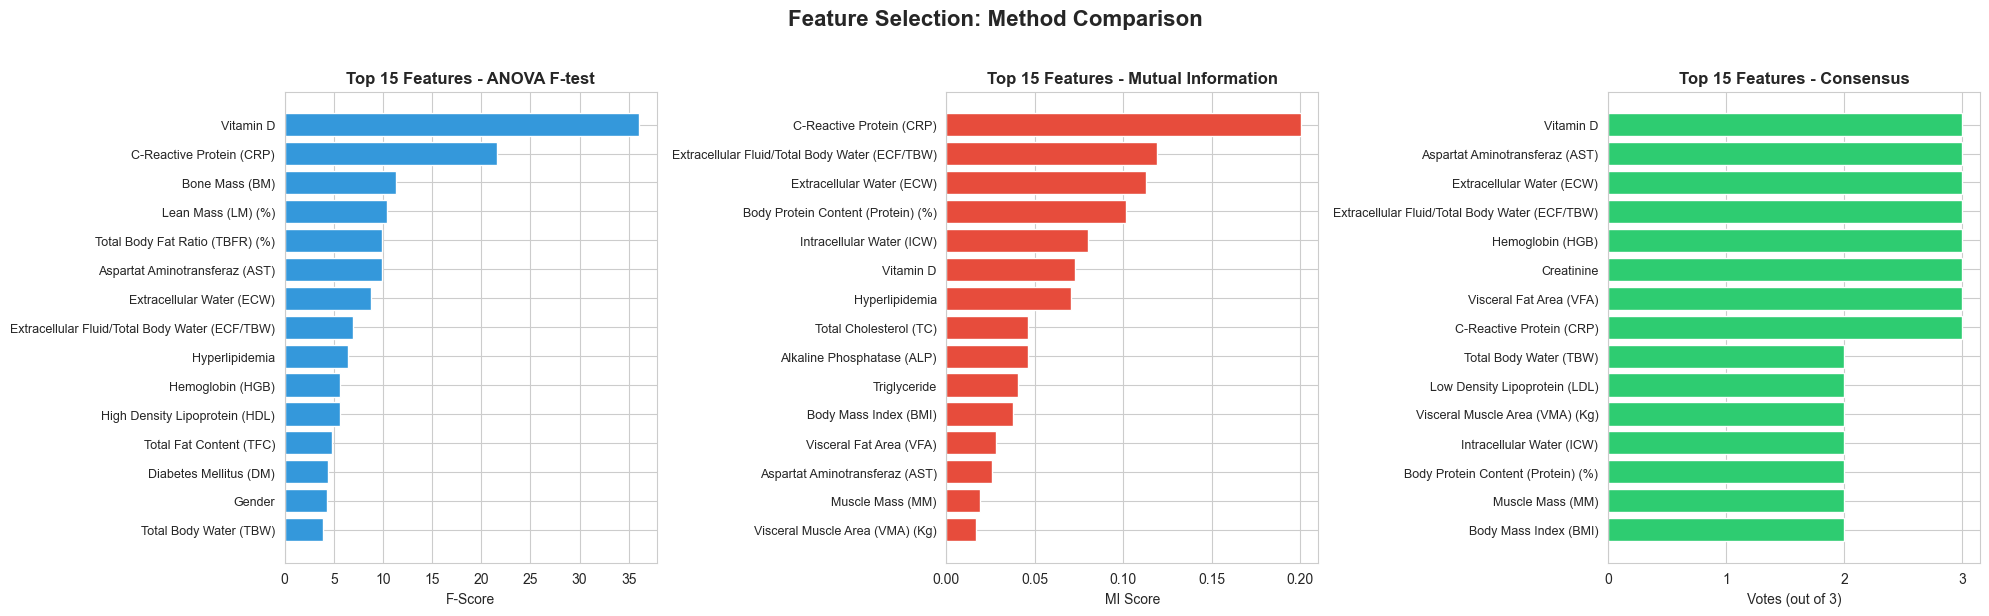

Feature importance visualization complete


In [264]:
# 4.5 Visualization - Feature Importance Comparison
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# ANOVA scores
top_anova = feature_scores_anova.head(15)
axes[0].barh(top_anova['Feature'], top_anova['F_Score'], color='#3498db')
axes[0].set_xlabel('F-Score')
axes[0].set_title('Top 15 Features - ANOVA F-test', fontweight='bold', fontsize=12)
axes[0].invert_yaxis()
axes[0].tick_params(axis='y', labelsize=9)

# Mutual Information scores
top_mi = feature_scores_mi.head(15)
axes[1].barh(top_mi['Feature'], top_mi['MI_Score'], color='#e74c3c')
axes[1].set_xlabel('MI Score')
axes[1].set_title('Top 15 Features - Mutual Information', fontweight='bold', fontsize=12)
axes[1].invert_yaxis()
axes[1].tick_params(axis='y', labelsize=9)

# Consensus votes
top_consensus = consensus_df.head(15)
axes[2].barh(top_consensus['Feature'], top_consensus['Votes'], color='#2ecc71')
axes[2].set_xlabel('Votes (out of 3)')
axes[2].set_title('Top 15 Features - Consensus', fontweight='bold', fontsize=12)
axes[2].set_xticks([0, 1, 2, 3])
axes[2].invert_yaxis()
axes[2].tick_params(axis='y', labelsize=9)

plt.suptitle('Feature Selection: Method Comparison', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("Feature importance visualization complete")

### 4.6 Create Reduced Feature Sets

In [265]:
# 4.6 Create Reduced Feature Sets
# Use if you want to train models on reduced features
X_train_reduced = X_train_scaled[consensus_features]
X_test_reduced = X_test_scaled[consensus_features]

print("="*70)
print("REDUCED FEATURE DATASETS CREATED")
print("="*70)
print(f"Original features: {len(feature_names)}")
print(f"Consensus features: {len(consensus_features)}")
print(f"Reduction: {len(feature_names) - len(consensus_features)} features removed ({(1 - len(consensus_features)/len(feature_names))*100:.1f}% reduction)")

print(f"\nReduced training set shape: {X_train_reduced.shape}")
print(f"Reduced test set shape: {X_test_reduced.shape}")

print("\nConsensus features list:")
for idx, feat in enumerate(consensus_features, 1):
    print(f"  {idx:2d}. {feat}")

REDUCED FEATURE DATASETS CREATED
Original features: 38
Consensus features: 21
Reduction: 17 features removed (44.7% reduction)

Reduced training set shape: (255, 21)
Reduced test set shape: (64, 21)

Consensus features list:
   1. Vitamin D
   2. C-Reactive Protein (CRP)
   3. Bone Mass (BM)
   4. Lean Mass (LM) (%)
   5. Total Body Fat Ratio (TBFR) (%)
   6. Aspartat Aminotransferaz (AST)
   7. Extracellular Water (ECW)
   8. Extracellular Fluid/Total Body Water (ECF/TBW)
   9. Hyperlipidemia
  10. Hemoglobin (HGB)
  11. High Density Lipoprotein (HDL)
  12. Total Fat Content (TFC)
  13. Total Body Water (TBW)
  14. Creatinine
  15. Visceral Fat Area (VFA)
  16. Body Mass Index (BMI)
  17. Muscle Mass (MM)
  18. Body Protein Content (Protein) (%)
  19. Intracellular Water (ICW)
  20. Visceral Muscle Area (VMA) (Kg)
  21. Low Density Lipoprotein (LDL)


### 4.7 Feature Selection Summary

In [266]:
# Final Summary for Section 4
print("="*70)
print("SECTION 4 COMPLETE - Feature Selection")
print("="*70)

print("\nThree feature selection methods applied:")
print(f"  1. ANOVA F-test: {len(selected_features_anova)} features selected")
print(f"  2. Mutual Information: {len(selected_features_mi)} features selected")
print(f"  3. RFE (Random Forest): {len(selected_features_rfe)} features selected")

print("\nConsensus analysis performed:")
print(f"  - Total unique features selected: {len(feature_votes)}")
print(f"  - Features selected by all 3 methods: {len(features_all_3)}")
print(f"  - Features selected by 2+ methods: {len(consensus_features)}")

print("\nDatasets available for modeling:")
print(f"  - X_train_scaled, X_test_scaled (all {len(feature_names)} features)")
print(f"  - X_train_reduced, X_test_reduced ({len(consensus_features)} consensus features)")

print("\nFeature selection results:")
print("  - feature_scores_anova (ANOVA F-test scores)")
print("  - feature_scores_mi (Mutual Information scores)")
print("  - feature_ranking_rfe (RFE rankings)")
print("  - consensus_df (consensus voting results)")
print(f"  - consensus_features (list of {len(consensus_features)} consensus features)")

print("\n" + "="*70)
print("RECOMMENDATIONS FOR MODEL BUILDING")
print("="*70)
print(f"Option 1: Use ALL {len(feature_names)} features")
print("  Comprehensive analysis")
print("  Captures all potential patterns")
print("  ⚠ Risk of overfitting with 319 samples")
print(f"\nOption 2: Use {len(consensus_features)} CONSENSUS features")
print("  Reduced complexity")
print("  Features validated by multiple methods")
print("  Better generalization potential")
print("\nRECOMMENDATION: Train models on BOTH and compare performance!")

SECTION 4 COMPLETE - Feature Selection

Three feature selection methods applied:
  1. ANOVA F-test: 20 features selected
  2. Mutual Information: 20 features selected
  3. RFE (Random Forest): 20 features selected

Consensus analysis performed:
  - Total unique features selected: 31
  - Features selected by all 3 methods: 8
  - Features selected by 2+ methods: 21

Datasets available for modeling:
  - X_train_scaled, X_test_scaled (all 38 features)
  - X_train_reduced, X_test_reduced (21 consensus features)

Feature selection results:
  - feature_scores_anova (ANOVA F-test scores)
  - feature_scores_mi (Mutual Information scores)
  - feature_ranking_rfe (RFE rankings)
  - consensus_df (consensus voting results)
  - consensus_features (list of 21 consensus features)

RECOMMENDATIONS FOR MODEL BUILDING
Option 1: Use ALL 38 features
  Comprehensive analysis
  Captures all potential patterns
  ⚠ Risk of overfitting with 319 samples

Option 2: Use 21 CONSENSUS features
  Reduced complexity
 

## Section 5: Model 1 - Logistic Regression (Baseline)

**Objective:** Establish baseline performance with interpretable linear model

**Tasks:**
- Define hyperparameter grid
- Perform GridSearchCV with 5-fold CV
- Extract best model
- Evaluate on training set (CV)
- Evaluate on test set
- Generate confusion matrix
- Extract feature coefficients
- Calculate odds ratios
- Plot ROC curve
- Visualize top features
- Save model results

**Key Outputs:**
- Best hyperparameters (C, penalty)
- CV ROC-AUC score
- Test set performance metrics
- Top predictive features with coefficients
- Odds ratios for clinical interpretation

In [267]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

print("="*70)
print("MODEL 1: LOGISTIC REGRESSION")
print("="*70)
print("\nLogistic Regression is a linear model for binary classification.")
print("It models the probability of the target class using a logistic function.")
print("\nAdvantages:")
print("  Interpretable coefficients (feature importance)")
print("  Provides probability estimates")
print("  Fast to train and predict")
print("  Works well as a baseline model")
print("\nKey hyperparameters:")
print("  - C: Inverse regularization strength (smaller = stronger regularization)")
print("  - penalty: L1 (Lasso) or L2 (Ridge) regularization")
print("  - solver: Optimization algorithm")
print("="*70)

MODEL 1: LOGISTIC REGRESSION

Logistic Regression is a linear model for binary classification.
It models the probability of the target class using a logistic function.

Advantages:
  Interpretable coefficients (feature importance)
  Provides probability estimates
  Fast to train and predict
  Works well as a baseline model

Key hyperparameters:
  - C: Inverse regularization strength (smaller = stronger regularization)
  - penalty: L1 (Lasso) or L2 (Ridge) regularization
  - solver: Optimization algorithm


### 5.1 Hyperparameter Grid and Cross-Validation Setup

In [268]:
# 5.1 Define Hyperparameter Grid
log_reg_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],      # Regularization strength
    'penalty': ['l1', 'l2'],                          # L1 (Lasso) or L2 (Ridge)
    'solver': ['liblinear'],                          # Works with both L1 and L2
    'max_iter': [10000]                               # Ensure convergence
}

print("Hyperparameter Grid for Logistic Regression:")
print("="*70)
for param, values in log_reg_params.items():
    print(f"  {param:12s}: {values}")

# Calculate total combinations
total_combinations = 1
for values in log_reg_params.values():
    total_combinations *= len(values)
print(f"\nTotal hyperparameter combinations: {total_combinations}")
print("="*70)

# 5.2 Initialize Logistic Regression
log_reg = LogisticRegression(
    random_state=RANDOM_STATE,
    class_weight='balanced'  # Handle class imbalance
)

print("\nLogistic Regression initialized with:")
print(f"  - random_state: {RANDOM_STATE}")
print("  - class_weight: 'balanced' (automatic adjustment for class imbalance)")

# 5.3 Setup Cross-Validation Strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

print("\nCross-validation strategy:")
print("  - Method: StratifiedKFold")
print("  - Number of folds: 5")
print("  - Shuffle: True")
print("  - Maintains class proportions in each fold")
print("="*70)

Hyperparameter Grid for Logistic Regression:
  C           : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
  penalty     : ['l1', 'l2']
  solver      : ['liblinear']
  max_iter    : [10000]

Total hyperparameter combinations: 14

Logistic Regression initialized with:
  - random_state: 42
  - class_weight: 'balanced' (automatic adjustment for class imbalance)

Cross-validation strategy:
  - Method: StratifiedKFold
  - Number of folds: 5
  - Shuffle: True
  - Maintains class proportions in each fold


In [269]:
# 5.4 Grid Search with Cross-Validation
log_reg_grid = GridSearchCV(
    estimator=log_reg,
    param_grid=log_reg_params,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

print("\nStarting hyperparameter tuning with GridSearchCV...")
print("="*70)
print("This may take a few moments...")
print("="*70)

# Fit the model
log_reg_grid.fit(X_train_scaled, y_train)

print("\n" + "="*70)
print("HYPERPARAMETER TUNING RESULTS")
print("="*70)
print(f"Best parameters: {log_reg_grid.best_params_}")
print(f"Best CV ROC-AUC score: {log_reg_grid.best_score_:.4f}")

# Extract best model
best_log_reg = log_reg_grid.best_estimator_



Starting hyperparameter tuning with GridSearchCV...
This may take a few moments...
Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] END C=0.001, max_iter=10000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=10000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=10000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=10000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=10000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=10000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=10000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=10000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=10000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=10000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter

### 5.2 Cross-Validation Performance (Training Set)

In [270]:
# 5.5 Evaluate on Training Set (Cross-Validation)
print("="*70)
print("CROSS-VALIDATION PERFORMANCE (Training Set)")
print("="*70)

cv_results = cross_validate(
    best_log_reg,
    X_train_scaled,
    y_train,
    cv=cv,
    scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
    return_train_score=False
)

print("\nCross-validation results (5-fold):")
print(f"  Accuracy:  {cv_results['test_accuracy'].mean():.4f} ± {cv_results['test_accuracy'].std():.4f}")
print(f"  Precision: {cv_results['test_precision'].mean():.4f} ± {cv_results['test_precision'].std():.4f}")
print(f"  Recall:    {cv_results['test_recall'].mean():.4f} ± {cv_results['test_recall'].std():.4f}")
print(f"  F1-Score:  {cv_results['test_f1'].mean():.4f} ± {cv_results['test_f1'].std():.4f}")
print(f"  ROC-AUC:   {cv_results['test_roc_auc'].mean():.4f} ± {cv_results['test_roc_auc'].std():.4f}")

print("\nCross-validation evaluation complete")
print("="*70)

CROSS-VALIDATION PERFORMANCE (Training Set)

Cross-validation results (5-fold):
  Accuracy:  0.7412 ± 0.0798
  Precision: 0.7668 ± 0.0781
  Recall:    0.6837 ± 0.1080
  F1-Score:  0.7210 ± 0.0896
  ROC-AUC:   0.8258 ± 0.0655

Cross-validation evaluation complete


### 5.3 Test Set Performance (Held-Out Data)

In [271]:
# 5.6 Evaluate on Test Set
print("="*70)
print("TEST SET PERFORMANCE (Held-Out Data)")
print("="*70)

# Make predictions
y_pred_lr = best_log_reg.predict(X_test_scaled)
y_pred_proba_lr = best_log_reg.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
test_accuracy = accuracy_score(y_test, y_pred_lr)
test_precision = precision_score(y_test, y_pred_lr)
test_recall = recall_score(y_test, y_pred_lr)
test_f1 = f1_score(y_test, y_pred_lr)
test_roc_auc = roc_auc_score(y_test, y_pred_proba_lr)

print("\nTest set performance metrics:")
print(f"  Accuracy:  {test_accuracy:.4f}")
print(f"  Precision: {test_precision:.4f}")
print(f"  Recall:    {test_recall:.4f}")
print(f"  F1-Score:  {test_f1:.4f}")
print(f"  ROC-AUC:   {test_roc_auc:.4f}")

print("\nClassification Report:")
print("="*70)
print(classification_report(y_test, y_pred_lr, target_names=['No Gallstones', 'Gallstones']))

print("="*70)
print("Test set evaluation complete")
print("="*70)

TEST SET PERFORMANCE (Held-Out Data)

Test set performance metrics:
  Accuracy:  0.7812
  Precision: 0.8000
  Recall:    0.7500
  F1-Score:  0.7742
  ROC-AUC:   0.8828

Classification Report:
               precision    recall  f1-score   support

No Gallstones       0.76      0.81      0.79        32
   Gallstones       0.80      0.75      0.77        32

     accuracy                           0.78        64
    macro avg       0.78      0.78      0.78        64
 weighted avg       0.78      0.78      0.78        64

Test set evaluation complete


### 5.4 Confusion Matrix

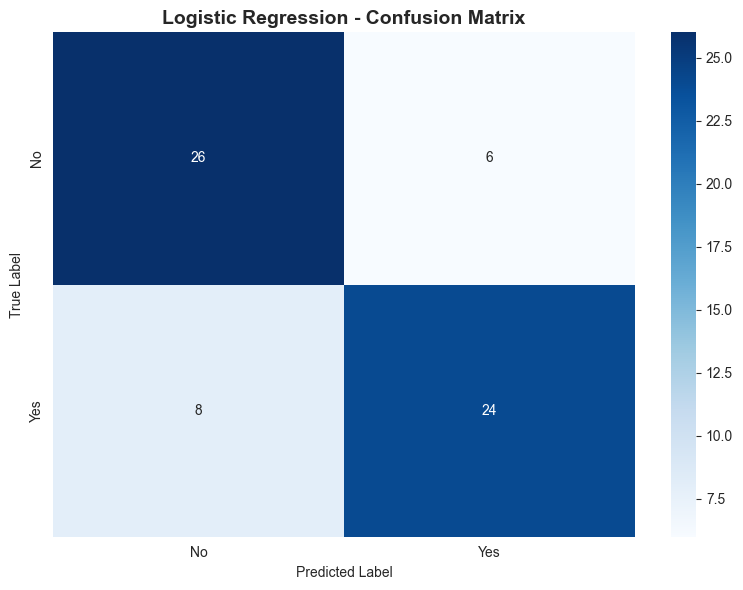


Confusion Matrix Breakdown:
  True Negatives (TN):  26 - Correctly predicted No Gallstones
  False Positives (FP): 6 - Incorrectly predicted Gallstones
  False Negatives (FN): 8 - Missed Gallstones cases
  True Positives (TP):  24 - Correctly predicted Gallstones

Confusion matrix generated


In [272]:
# 5.7 Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Logistic Regression - Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Print confusion matrix details
print("\nConfusion Matrix Breakdown:")
print(f"  True Negatives (TN):  {cm_lr[0, 0]} - Correctly predicted No Gallstones")
print(f"  False Positives (FP): {cm_lr[0, 1]} - Incorrectly predicted Gallstones")
print(f"  False Negatives (FN): {cm_lr[1, 0]} - Missed Gallstones cases")
print(f"  True Positives (TP):  {cm_lr[1, 1]} - Correctly predicted Gallstones")

print("\nConfusion matrix generated")
print("="*70)

### 5.5 Feature Coefficients and Odds Ratios

In [273]:
# 5.8 Feature Coefficients and Odds Ratios
print("="*70)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*70)

coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': best_log_reg.coef_[0],
    'Abs_Coefficient': np.abs(best_log_reg.coef_[0]),
    'Odds_Ratio': np.exp(best_log_reg.coef_[0])
}).sort_values('Abs_Coefficient', ascending=False)

print("\nTop 15 Most Important Features:")
print("="*70)
print(coefficients.head(15).to_string(index=False))

print("\nInterpretation:")
print("  - Positive coefficient: Increases probability of gallstones")
print("  - Negative coefficient: Decreases probability of gallstones")
print("  - Odds Ratio > 1: Increases odds of gallstones")
print("  - Odds Ratio < 1: Decreases odds of gallstones")

print("\nFeature coefficients and odds ratios calculated")
print("="*70)

FEATURE IMPORTANCE ANALYSIS

Top 15 Most Important Features:
                                       Feature  Coefficient  Abs_Coefficient  Odds_Ratio
                      C-Reactive Protein (CRP)     1.533153         1.533153    4.632761
                                        Gender    -1.346294         1.346294    0.260203
                                Bone Mass (BM)    -1.307077         1.307077    0.270610
                     Intracellular Water (ICW)     0.970368         0.970368    2.638915
                Aspartat Aminotransferaz (AST)    -0.936446         0.936446    0.392019
                                     Vitamin D    -0.913365         0.913365    0.401172
Extracellular Fluid/Total Body Water (ECF/TBW)    -0.811793         0.811793    0.444061
                                Hyperlipidemia     0.802893         0.802893    2.231988
                       Total Fat Content (TFC)    -0.739790         0.739790    0.477214
                                           Age   

### 5.6 Feature Importance Visualization

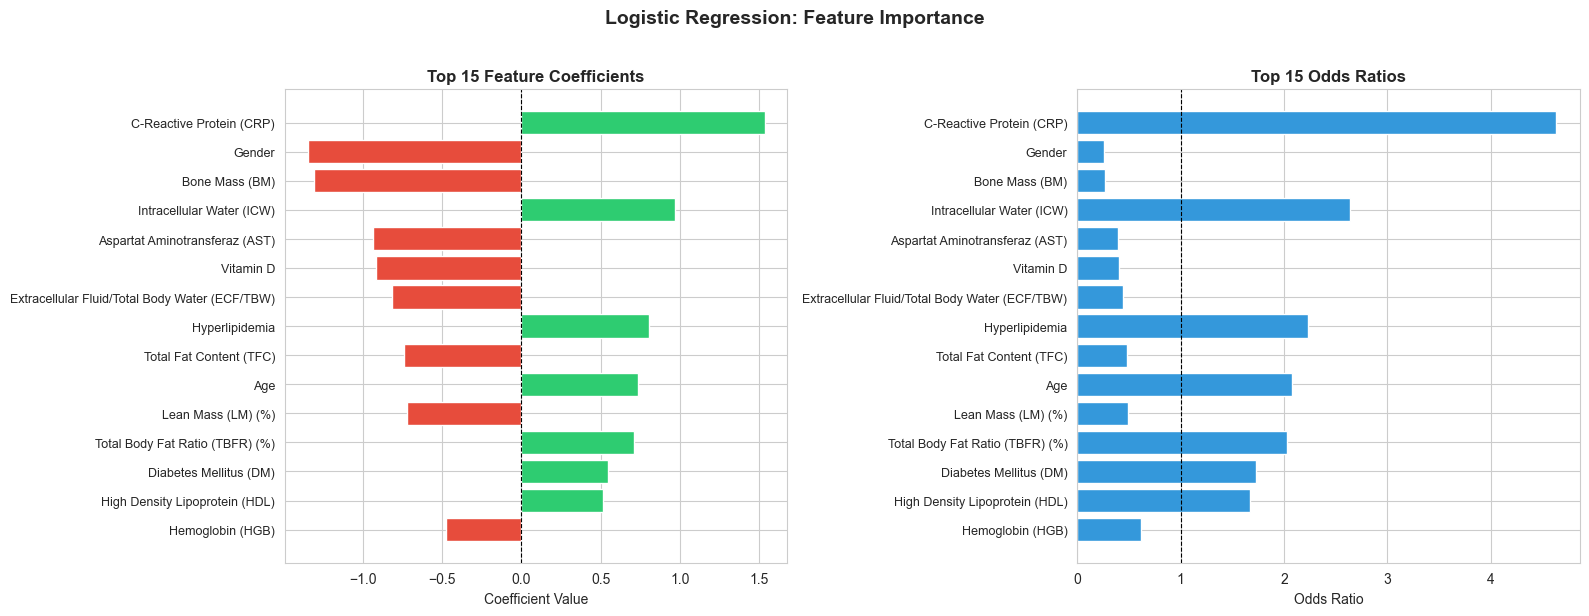

Feature importance visualizations generated


In [274]:
# 5.9 Visualization - Feature Coefficients and Odds Ratios
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top 15 coefficients
top_15_coef = coefficients.head(15)
colors = ['#e74c3c' if x < 0 else '#2ecc71' for x in top_15_coef['Coefficient']]
axes[0].barh(top_15_coef['Feature'], top_15_coef['Coefficient'], color=colors)
axes[0].axvline(x=0, color='black', linestyle='--', linewidth=0.8)
axes[0].set_xlabel('Coefficient Value')
axes[0].set_title('Top 15 Feature Coefficients', fontsize=12, fontweight='bold')
axes[0].invert_yaxis()
axes[0].tick_params(axis='y', labelsize=9)

# Top 15 odds ratios
axes[1].barh(top_15_coef['Feature'], top_15_coef['Odds_Ratio'], color='#3498db')
axes[1].axvline(x=1, color='black', linestyle='--', linewidth=0.8)
axes[1].set_xlabel('Odds Ratio')
axes[1].set_title('Top 15 Odds Ratios', fontsize=12, fontweight='bold')
axes[1].invert_yaxis()
axes[1].tick_params(axis='y', labelsize=9)

plt.suptitle('Logistic Regression: Feature Importance', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("Feature importance visualizations generated")
print("="*70)

### 5.7 ROC Curve

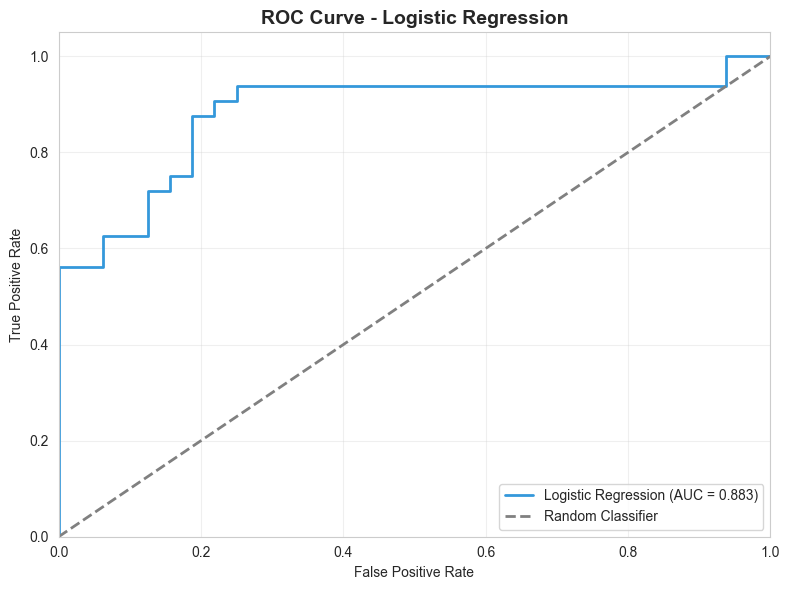

ROC-AUC Score: 0.8828

ROC curve generated


In [275]:
# 5.10 ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='#3498db', lw=2, 
         label=f'Logistic Regression (AUC = {roc_auc_lr:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"ROC-AUC Score: {roc_auc_lr:.4f}")
print("\nROC curve generated")
print("="*70)

### 5.8 Save Results and Summary

In [276]:
# 5.11 Save results in a dictionary for later comparison
lr_results = {
    'model': best_log_reg,
    'y_pred': y_pred_lr,
    'y_pred_proba': y_pred_proba_lr,
    'cv_score': log_reg_grid.best_score_,
    'test_accuracy': test_accuracy,
    'test_precision': test_precision,
    'test_recall': test_recall,
    'test_f1': test_f1,
    'test_roc_auc': roc_auc_lr,
    'coefficients': coefficients,
    'confusion_matrix': cm_lr
}

print("="*70)
print("SECTION 5 COMPLETE - Logistic Regression Model")
print("="*70)

print("\nModel Training Summary:")
print(f"  - Best hyperparameters: C={log_reg_grid.best_params_['C']}, penalty={log_reg_grid.best_params_['penalty']}")
print(f"  - Total combinations tested: {total_combinations}")
print("  - Cross-validation folds: 5")

print("\nPerformance Metrics:")
print(f"  - CV ROC-AUC:    {log_reg_grid.best_score_:.4f}")
print(f"  - Test ROC-AUC:  {roc_auc_lr:.4f}")
print(f"  - Test Accuracy: {test_accuracy:.4f}")
print(f"  - Test F1-Score: {test_f1:.4f}")

print("\nFeature Importance:")
print(f"  - Top positive predictor: {coefficients[coefficients['Coefficient'] > 0].iloc[0]['Feature']}")
print(f"  - Top negative predictor: {coefficients[coefficients['Coefficient'] < 0].iloc[0]['Feature']}")

print("\nResults saved in 'lr_results' dictionary")
print(f"  - Keys: {list(lr_results.keys())}")

SECTION 5 COMPLETE - Logistic Regression Model

Model Training Summary:
  - Best hyperparameters: C=1, penalty=l2
  - Total combinations tested: 14
  - Cross-validation folds: 5

Performance Metrics:
  - CV ROC-AUC:    0.8258
  - Test ROC-AUC:  0.8828
  - Test Accuracy: 0.7812
  - Test F1-Score: 0.7742

Feature Importance:
  - Top positive predictor: C-Reactive Protein (CRP)
  - Top negative predictor: Gender

Results saved in 'lr_results' dictionary
  - Keys: ['model', 'y_pred', 'y_pred_proba', 'cv_score', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1', 'test_roc_auc', 'coefficients', 'confusion_matrix']


## Section 6: Model 2 - Random Forest

**Objective:** Build ensemble tree-based model with feature importance

### 6.1 Model Setup and Hyperparameter Grid

In [277]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

print("="*70)
print("MODEL 2: RANDOM FOREST")
print("="*70)

# 6.1 Define Hyperparameter Grid
rf_params = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True],
    'class_weight': ['balanced', None]
}

# 6.2 Initialize Random Forest
rf_model = RandomForestClassifier(
    random_state=RANDOM_STATE,
    n_jobs=-1,
    oob_score=True  # Out-of-bag score
)

print("\nRandom Forest Classifier initialized")
print("Number of parameter combinations to test: ~50 (RandomizedSearchCV)")
print(f"Hyperparameter grid defined with {len(rf_params)} parameters")

MODEL 2: RANDOM FOREST

Random Forest Classifier initialized
Number of parameter combinations to test: ~50 (RandomizedSearchCV)
Hyperparameter grid defined with 7 parameters


### 6.2 Hyperparameter Tuning with RandomizedSearchCV

In [278]:
# 6.3 Grid Search with Cross-Validation
# Note: Full grid search would take very long, use RandomizedSearchCV for efficiency

print("\nStarting hyperparameter tuning (Randomized Search)...")
print("This may take a few minutes...")

rf_random = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_params,
    n_iter=50,  # Try 50 random combinations
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2,
    random_state=RANDOM_STATE,
    return_train_score=True
)

rf_random.fit(X_train_scaled, y_train)

print(f"\n{'='*70}")
print("HYPERPARAMETER TUNING RESULTS")
print(f"{'='*70}")
print(f"Best parameters: {rf_random.best_params_}")
print(f"Best CV ROC-AUC score: {rf_random.best_score_:.4f}")

# 6.4 Extract Best Model
best_rf = rf_random.best_estimator_

if hasattr(best_rf, 'oob_score_'):
    print(f"Out-of-bag score: {best_rf.oob_score_:.4f}")


Starting hyperparameter tuning (Randomized Search)...
This may take a few minutes...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END bootstrap=True, class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced,

### 6.3 Cross-Validation Performance

In [279]:
# 6.5 Evaluate on Training Set (Cross-Validation)
print(f"\n{'='*70}")
print("CROSS-VALIDATION PERFORMANCE (Training Set)")
print(f"{'='*70}")

cv_results_rf = cross_validate(
    best_rf,
    X_train_scaled,
    y_train,
    cv=cv,
    scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
    return_train_score=False
)

print(f"Accuracy:  {cv_results_rf['test_accuracy'].mean():.4f} ± {cv_results_rf['test_accuracy'].std():.4f}")
print(f"Precision: {cv_results_rf['test_precision'].mean():.4f} ± {cv_results_rf['test_precision'].std():.4f}")
print(f"Recall:    {cv_results_rf['test_recall'].mean():.4f} ± {cv_results_rf['test_recall'].std():.4f}")
print(f"F1-Score:  {cv_results_rf['test_f1'].mean():.4f} ± {cv_results_rf['test_f1'].std():.4f}")
print(f"ROC-AUC:   {cv_results_rf['test_roc_auc'].mean():.4f} ± {cv_results_rf['test_roc_auc'].std():.4f}")


CROSS-VALIDATION PERFORMANCE (Training Set)
Accuracy:  0.7569 ± 0.0708
Precision: 0.7607 ± 0.0785
Recall:    0.7465 ± 0.0722
F1-Score:  0.7526 ± 0.0701
ROC-AUC:   0.8503 ± 0.0481


### 6.4 Test Set Performance

In [280]:
# 6.6 Evaluate on Test Set
print(f"\n{'='*70}")
print("TEST SET PERFORMANCE (Held-Out Data)")
print(f"{'='*70}")

y_pred_rf = best_rf.predict(X_test_scaled)
y_pred_proba_rf = best_rf.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
test_accuracy = accuracy_score(y_test, y_pred_rf)
test_precision = precision_score(y_test, y_pred_rf)
test_recall = recall_score(y_test, y_pred_rf)
test_f1 = f1_score(y_test, y_pred_rf)
test_roc_auc = roc_auc_score(y_test, y_pred_proba_rf)

print(f"Accuracy:  {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall:    {test_recall:.4f}")
print(f"F1-Score:  {test_f1:.4f}")
print(f"ROC-AUC:   {test_roc_auc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['No Gallstones', 'Gallstones']))


TEST SET PERFORMANCE (Held-Out Data)
Accuracy:  0.7812
Precision: 0.8000
Recall:    0.7500
F1-Score:  0.7742
ROC-AUC:   0.8721

Classification Report:
               precision    recall  f1-score   support

No Gallstones       0.76      0.81      0.79        32
   Gallstones       0.80      0.75      0.77        32

     accuracy                           0.78        64
    macro avg       0.78      0.78      0.78        64
 weighted avg       0.78      0.78      0.78        64



### 6.5 Confusion Matrix

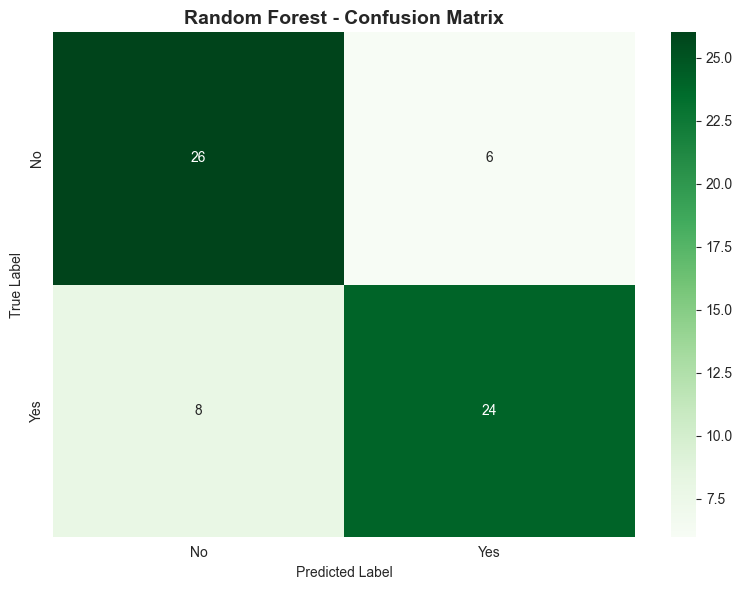

In [281]:
# 6.7 Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Random Forest - Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

### 6.6 Feature Importance Analysis


FEATURE IMPORTANCE ANALYSIS

Top 15 Most Important Features:
                                       Feature  Importance
                      C-Reactive Protein (CRP)    0.150517
                                     Vitamin D    0.093939
Extracellular Fluid/Total Body Water (ECF/TBW)    0.043654
                     Extracellular Water (ECW)    0.038369
                Aspartat Aminotransferaz (AST)    0.037587
               Visceral Muscle Area (VMA) (Kg)    0.033419
                                   Obesity (%)    0.029126
                                    Creatinine    0.028002
              Glomerular Filtration Rate (GFR)    0.026440
                    Alkaline Phosphatase (ALP)    0.026439
            Body Protein Content (Protein) (%)    0.026426
                            Lean Mass (LM) (%)    0.025796
               Total Body Fat Ratio (TBFR) (%)    0.025095
                                Bone Mass (BM)    0.024876
                              Hemoglobin (HGB)    0.0

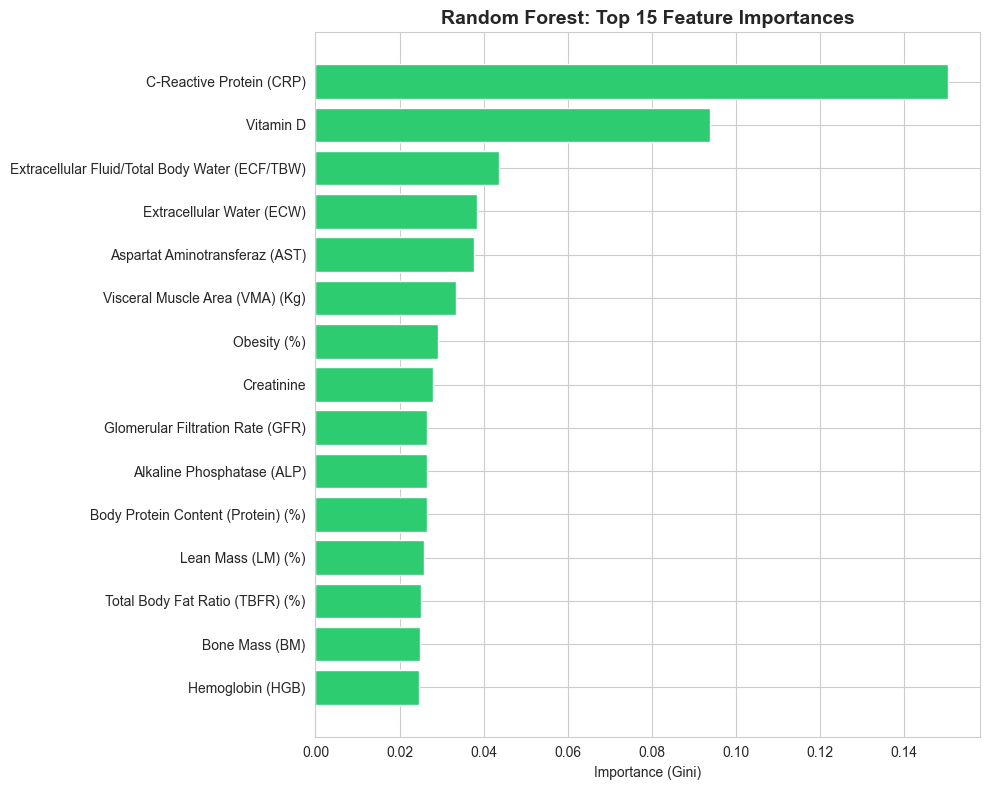

In [282]:
# 6.8 Feature Importance
print(f"\n{'='*70}")
print("FEATURE IMPORTANCE ANALYSIS")
print(f"{'='*70}")

feature_importance_rf = pd.DataFrame({
    'Feature': feature_names,
    'Importance': best_rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 15 Most Important Features:")
print(feature_importance_rf.head(15).to_string(index=False))

# 6.9 Visualization - Feature Importance
plt.figure(figsize=(10, 8))
top_15_rf = feature_importance_rf.head(15)
plt.barh(top_15_rf['Feature'], top_15_rf['Importance'], color='#2ecc71')
plt.xlabel('Importance (Gini)')
plt.title('Random Forest: Top 15 Feature Importances', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### 6.7 ROC Curve

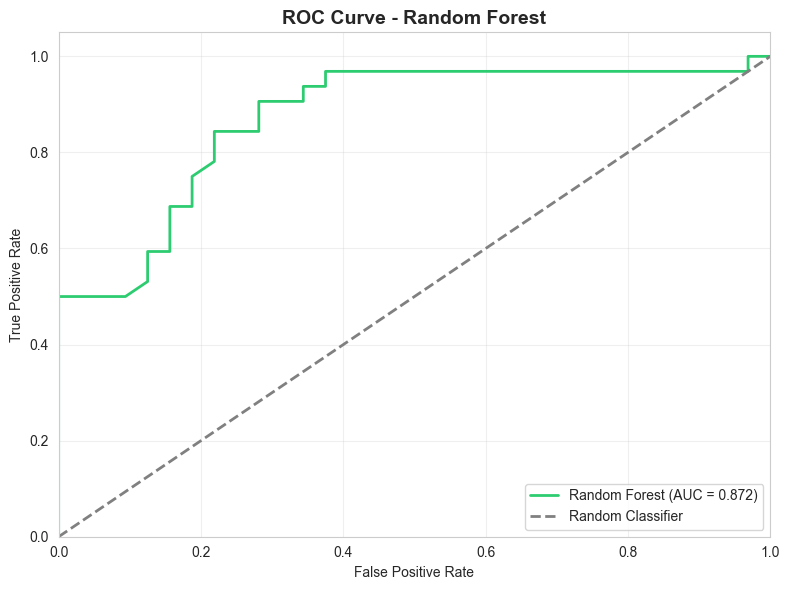

In [283]:
# 6.10 ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='#2ecc71', lw=2, 
         label=f'Random Forest (AUC = {roc_auc_rf:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### 6.8 Save Results and Summary

In [284]:
# 6.11 Save results in a dictionary for later comparison
rf_results = {
    'model': best_rf,
    'y_pred': y_pred_rf,
    'y_pred_proba': y_pred_proba_rf,
    'cv_score': rf_random.best_score_,
    'test_accuracy': test_accuracy,
    'test_precision': test_precision,
    'test_recall': test_recall,
    'test_f1': test_f1,
    'test_roc_auc': roc_auc_rf,
    'feature_importance': feature_importance_rf,
    'confusion_matrix': cm_rf
}

print("="*70)
print("Section 6 -Random Forest Model")
print("="*70)
print("\nModel successfully trained and evaluated!")
print(f"Best CV ROC-AUC: {rf_random.best_score_:.4f}")
print(f"Test ROC-AUC: {roc_auc_rf:.4f}")

Section 6 -Random Forest Model

Model successfully trained and evaluated!
Best CV ROC-AUC: 0.8503
Test ROC-AUC: 0.8721
